In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import Image
import sys, os
scr_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(scr_dir)

from preprocess_tf import data_pipe
import tensorflow as tf

In [2]:
ROOT_PATH = 'C://Users/gilbe/Documents/aifi-bootcamp'
"""
df = pd.read_csv(f'{ROOT_PATH}/data/aapl.csv')
"""

df = pd.read_csv(f'{ROOT_PATH}/data/aapl.csv')
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index('Unnamed: 0', inplace=True)
df.index.rename('Date', inplace=True)
# df.rename(columns={'Unnamed: 0', 'Date'}, inplace=True)
df.head()

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2022-01-24 04:05:00,162.0632,162.9520,162.0632,162.6025,10936.0
2022-01-24 04:10:00,162.7423,162.9620,162.6225,162.9620,7705.0
2022-01-24 04:15:00,162.7922,162.7922,162.5925,162.7623,7305.0
2022-01-24 04:20:00,162.6924,162.7223,162.3928,162.4627,9290.0
2022-01-24 04:25:00,162.3129,162.4826,162.2729,162.4327,6117.0


In [3]:
df.head()

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2022-01-24 04:05:00,162.0632,162.9520,162.0632,162.6025,10936.0
2022-01-24 04:10:00,162.7423,162.9620,162.6225,162.9620,7705.0
2022-01-24 04:15:00,162.7922,162.7922,162.5925,162.7623,7305.0
2022-01-24 04:20:00,162.6924,162.7223,162.3928,162.4627,9290.0
2022-01-24 04:25:00,162.3129,162.4826,162.2729,162.4327,6117.0


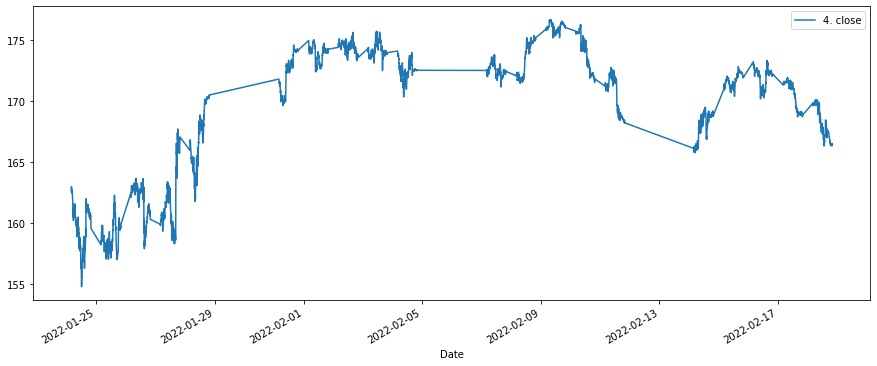

In [4]:
df[['4. close']].iloc[:, :10].plot(figsize=(15, 6));

# Recurent Neural Networks (RNN)
Recurrent Neural Networks take the time dimension into accout by introducing a recursive connection with a time delay of -1. Keras implements RNN with the class called SimpleRNN.

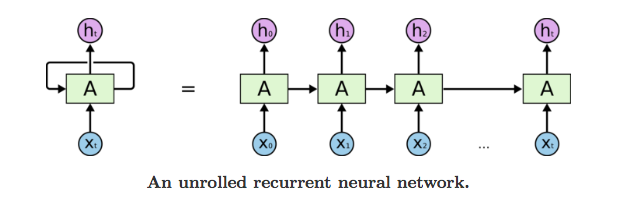

In [5]:
Image(filename="figures/rnn.png")

### Preprocess data
Train model on 10 stocks.

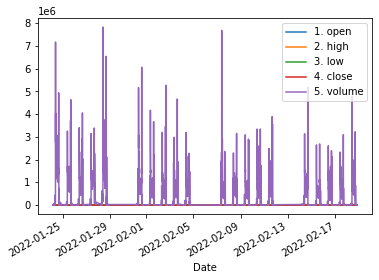

In [6]:
df = df.iloc[:, :10]
df.plot();

## RNN

In [7]:
def two_layered_rnn(
    units=20, 
    input_shape=1, 
    output_shape=1, 
    learning_rate=0.01
):
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.SimpleRNN(
        units,
        return_sequences=True,
        input_shape=[None, input_shape])
             )
    
    model.add(tf.keras.layers.SimpleRNN(units))
    model.add(tf.keras.layers.Dense(output_shape))
    
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate),
        loss=tf.keras.losses.Huber(),
        metrics=['mae', 'mse'])
    
    return model

In [8]:
def training_loop(model):
    metrics_df = pd.DataFrame()

    optim_param_dict = {}

    for c in df.columns:
        optim_param = pd.DataFrame()
        if df.loc[:, c].isnull().sum()/len(df) < 0.5:
            df.loc[:, c].plot(title=f'{c}');
            plt.show();
            print(c)
            print(df[c].shape)
            
            first_valid = df.loc[:, c].first_valid_index()
            
            data_dict = data_pipe(
                df.loc[first_valid:, c].values.reshape(-1, 1), 
                use_tf_data=False,
                use_transformer=True
            )

            xtrain, ytrain, xval, yval, xtest, ytest = (
                data_dict['xtrain'], data_dict['ytrain'], 
                data_dict['xval'], data_dict['yval'],  
                data_dict['xtest'], data_dict['ytest']
            )

            num_outputs = ytrain.shape[-1]
            hyper_lstm = None
            model = None
            model = two_layered_rnn()

            history = model.fit(xtrain,
                            ytrain,
                            batch_size=128,
                            epochs=20,
                            validation_data=(xval, yval),
                            verbose=1)
            
            pd.DataFrame(history.history).plot(figsize=(8, 5), grid=True)
            plt.gca().set_ylim(0, 500)
            plt.show();

            print('#' * 50)




# Training of RNN

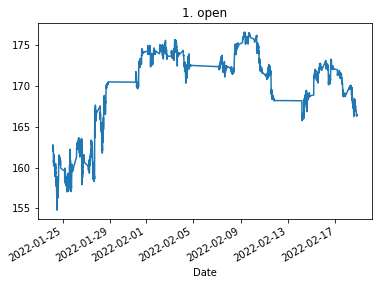

1. open
(3764,)
Train on 2793 samples, validate on 440 samples
Epoch 1/20
2793/2793 [==============================] - 3s 1ms/sample - loss: 161.8861 - mae: 162.3861 - mse: 26410.4492 - val_loss: 159.1707 - val_mae: 159.6707 - val_mse: 25498.7227
Epoch 2/20
2793/2793 [==============================] - 1s 262us/sample - loss: 156.1299 - mae: 156.6299 - mse: 24571.1816 - val_loss: 154.3784 - val_mae: 154.8784 - val_mse: 23991.3086
Epoch 3/20
2793/2793 [==============================] - 1s 264us/sample - loss: 151.4389 - mae: 151.9388 - mse: 23122.5137 - val_loss: 149.7400 - val_mae: 150.2400 - val_mse: 22576.0410
Epoch 4/20
2793/2793 [==============================] - 1s 264us/sample - loss: 146.8105 - mae: 147.3105 - mse: 21737.8574 - val_loss: 145.1174 - val_mae: 145.6174 - val_mse: 21208.4180
Epoch 5/20
2793/2793 [==============================] - 1s 257us/sample - loss: 142.1893 - mae: 142.6893 - mse: 20398.5039 - val_loss: 140.4970 - val_mae: 140.9970 - val_mse: 19884.1230
Epoch 6/2

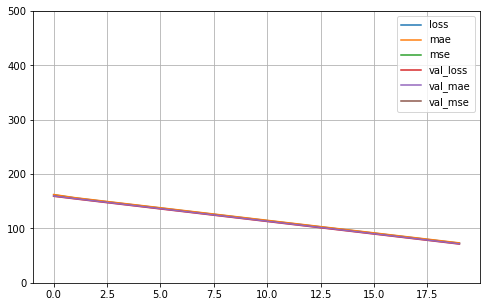

##################################################


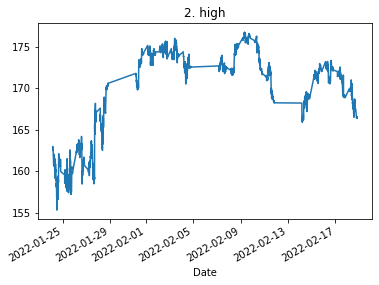

2. high
(3764,)
Train on 2793 samples, validate on 440 samples
Epoch 1/20
2793/2793 [==============================] - 2s 890us/sample - loss: 161.3414 - mae: 161.8414 - mse: 26234.0918 - val_loss: 158.5461 - val_mae: 159.0461 - val_mse: 25299.4141
Epoch 2/20
2793/2793 [==============================] - 1s 269us/sample - loss: 155.5739 - mae: 156.0739 - mse: 24396.5176 - val_loss: 153.7955 - val_mae: 154.2955 - val_mse: 23810.8457
Epoch 3/20
2793/2793 [==============================] - 1s 262us/sample - loss: 150.8985 - mae: 151.3985 - mse: 22957.8340 - val_loss: 149.1605 - val_mae: 149.6605 - val_mse: 22402.0117
Epoch 4/20
2793/2793 [==============================] - 1s 238us/sample - loss: 146.2716 - mae: 146.7716 - mse: 21578.5625 - val_loss: 144.5382 - val_mae: 145.0382 - val_mse: 21039.8379
Epoch 5/20
2793/2793 [==============================] - 1s 263us/sample - loss: 141.6504 - mae: 142.1504 - mse: 20244.2070 - val_loss: 139.9178 - val_mae: 140.4178 - val_mse: 19720.9004
Epoch 6

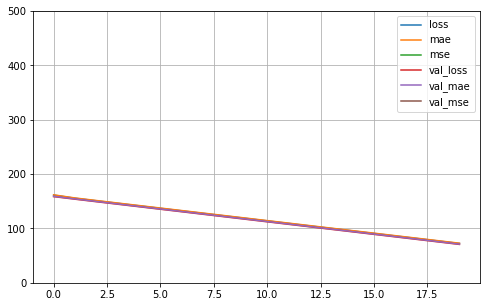

##################################################


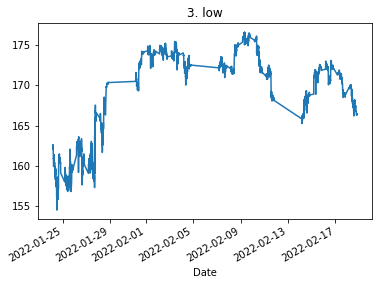

3. low
(3764,)
Train on 2793 samples, validate on 440 samples
Epoch 1/20
2793/2793 [==============================] - 3s 913us/sample - loss: 161.2065 - mae: 161.7065 - mse: 26191.4414 - val_loss: 158.5390 - val_mae: 159.0390 - val_mse: 25297.5098
Epoch 2/20
2793/2793 [==============================] - 1s 275us/sample - loss: 155.4609 - mae: 155.9609 - mse: 24362.9414 - val_loss: 153.7664 - val_mae: 154.2664 - val_mse: 23802.2266
Epoch 3/20
2793/2793 [==============================] - 1s 275us/sample - loss: 150.7763 - mae: 151.2763 - mse: 22922.4902 - val_loss: 149.1290 - val_mae: 149.6290 - val_mse: 22392.9629
Epoch 4/20
2793/2793 [==============================] - 1s 266us/sample - loss: 146.1483 - mae: 146.6483 - mse: 21544.0938 - val_loss: 144.5065 - val_mae: 145.0065 - val_mse: 21030.9980
Epoch 5/20
2793/2793 [==============================] - 1s 257us/sample - loss: 141.5270 - mae: 142.0270 - mse: 20210.8750 - val_loss: 139.8860 - val_mae: 140.3860 - val_mse: 19712.3438
Epoch 6/

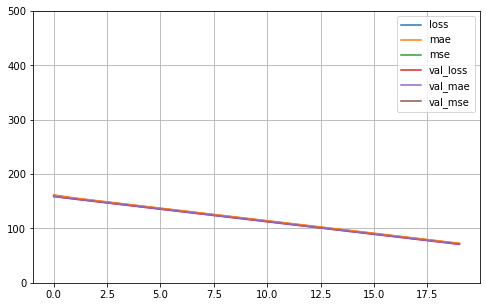

##################################################


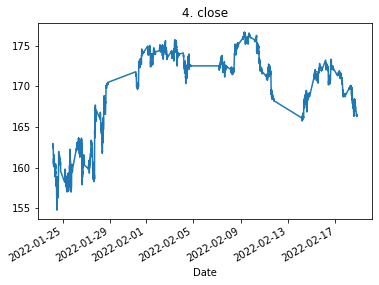

4. close
(3764,)
Train on 2793 samples, validate on 440 samples
Epoch 1/20
2793/2793 [==============================] - 3s 965us/sample - loss: 162.6506 - mae: 163.1506 - mse: 26659.6230 - val_loss: 159.9075 - val_mae: 160.4075 - val_mse: 25734.4492
Epoch 2/20
2793/2793 [==============================] - 1s 286us/sample - loss: 156.8729 - mae: 157.3729 - mse: 24804.4688 - val_loss: 155.1415 - val_mae: 155.6416 - val_mse: 24228.1523
Epoch 3/20
2793/2793 [==============================] - 1s 273us/sample - loss: 152.1919 - mae: 152.6919 - mse: 23351.9199 - val_loss: 150.5056 - val_mae: 151.0056 - val_mse: 22806.5586
Epoch 4/20
2793/2793 [==============================] - 1s 261us/sample - loss: 147.5647 - mae: 148.0647 - mse: 21960.6270 - val_loss: 145.8834 - val_mae: 146.3834 - val_mse: 21431.9688
Epoch 5/20
2793/2793 [==============================] - 1s 280us/sample - loss: 142.9436 - mae: 143.4436 - mse: 20614.3418 - val_loss: 141.2630 - val_mae: 141.7630 - val_mse: 20100.6133
Epoch 

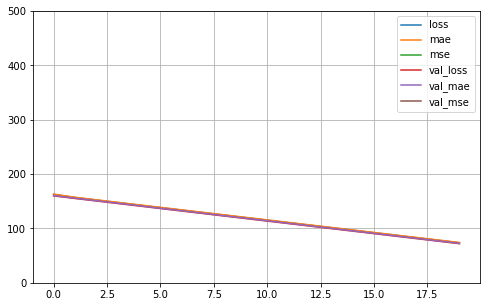

##################################################


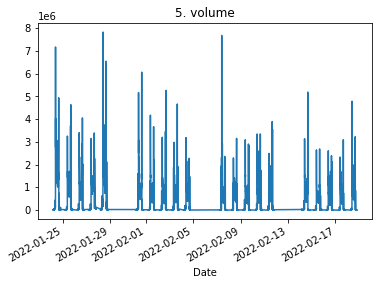

5. volume
(3764,)
Train on 2793 samples, validate on 440 samples
Epoch 1/20
2793/2793 [==============================] - 2s 851us/sample - loss: 516158.0244 - mae: 516158.5000 - mse: 880930521088.0000 - val_loss: 334889.2080 - val_mae: 334889.7500 - val_mse: 425714319360.0000
Epoch 2/20
2793/2793 [==============================] - 1s 264us/sample - loss: 516151.2609 - mae: 516151.7188 - mse: 880923639808.0000 - val_loss: 334884.3330 - val_mae: 334884.8438 - val_mse: 425711075328.0000
Epoch 3/20
2793/2793 [==============================] - 1s 253us/sample - loss: 516146.5305 - mae: 516147.0000 - mse: 880918790144.0000 - val_loss: 334879.6989 - val_mae: 334880.1875 - val_mse: 425707929600.0000
Epoch 4/20
2793/2793 [==============================] - 1s 256us/sample - loss: 516141.9031 - mae: 516142.3750 - mse: 880913874944.0000 - val_loss: 334875.0608 - val_mae: 334875.5625 - val_mse: 425704816640.0000
Epoch 5/20
2793/2793 [==============================] - 1s 256us/sample - loss: 516137.

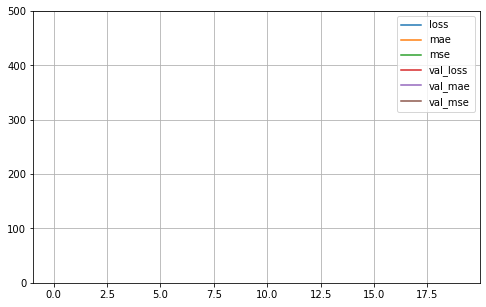

##################################################


In [9]:
model = two_layered_rnn()
training_loop(model)

## Gated Recurrent Networks

RNNs suffer from exploding or vanishing gradients. RNNs can have a hard time to learn long term dependencies.

**Solutions**:
* Exploding gradients can be addressed by gradient clipping
* Vanishing gradients can be addressed by gater recurrent units



**Examples of gated recurrent units**:
* Long Short Term Memory Networks (LSTM)
* Gated Recurrent Unit (GRU)

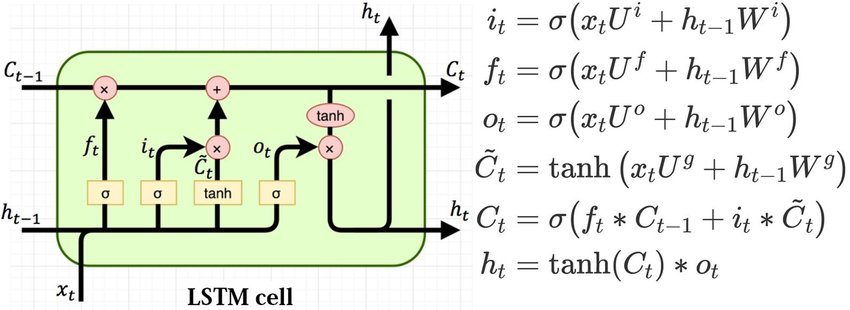

In [11]:
Image(filename="figures/lstm.jpg")

In [12]:
def two_layered_lstm(units=20, input_shape=1, output_shape=1, learning_rate=0.01):
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.LSTM(
        units,
        return_sequences=True,
        input_shape=[None, input_shape])
             )
    
    model.add(tf.keras.layers.LSTM(units))
    model.add(tf.keras.layers.Dense(output_shape))
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate),
        loss=tf.keras.losses.Huber(),
        metrics=['mae', 'mse'])
    
    return model

## Training of LSTM

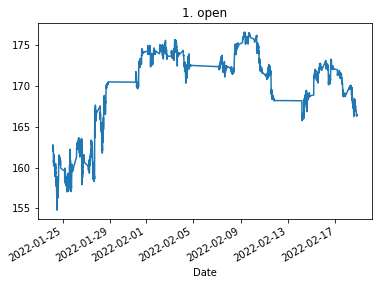

1. open
(3764,)
Train on 2793 samples, validate on 440 samples
Epoch 1/20
2793/2793 [==============================] - 2s 863us/sample - loss: 161.6256 - mae: 162.1256 - mse: 26328.8535 - val_loss: 158.5846 - val_mae: 159.0846 - val_mse: 25311.8867
Epoch 2/20
2793/2793 [==============================] - 1s 262us/sample - loss: 155.5548 - mae: 156.0548 - mse: 24391.3535 - val_loss: 153.8081 - val_mae: 154.3081 - val_mse: 23814.9746
Epoch 3/20
2793/2793 [==============================] - 1s 274us/sample - loss: 150.8691 - mae: 151.3692 - mse: 22949.7109 - val_loss: 149.1705 - val_mae: 149.6705 - val_mse: 22405.2480
Epoch 4/20
2793/2793 [==============================] - 1s 264us/sample - loss: 146.2411 - mae: 146.7410 - mse: 21570.4023 - val_loss: 144.5480 - val_mae: 145.0479 - val_mse: 21042.8867
Epoch 5/20
1664/2793 [================>.............] - ETA: 0s - loss: 142.7811 - mae: 143.2811 - mse: 20564.4609

In [ ]:
model = two_layered_lstm()
training_loop(model)